# Модель жизненных сценариев

# Основные положения

* Животное живет 1000 шагов, условно 70 лет.
* Животное достигает наилучших показателей чуть раньше середины своей жизни (30 лет). Назовем такое животное условно "взрослое".
* Процесс, когда животное стоит на месте и не ест, назовем "пассивным" голоданием.
* Процесс, когда животное передивгается и не ест, назовем "активным" голоданием.
* Взрослое животное может прожить около 50 шагов пассивного голодания.
* Взрослое животное может прожить около 30 - 40 шагов активного голодания в зависимости от скорости движения.
* Максимальная скорость взрослого животного 10 клеток за 1 шаг. При движении с максимальной скоростью запас сил тратиться так же максимально быстро.
* Комфортная скорость взрослого животного 4 клетки за 1 шаг. При движении с комфортной скоростью Запас сил восстанавливается.
* При максимальным запасом сил взрослое животное может пройти 5 шагов с максимальной скоростью.
* Согласно составленной модели запас сил начинает ощутимо убывать, когда соотношение $\frac{E}{E_{max}} < 0.6$. Назовем это значение уровнем сильного голода. Взрослое животное должно востанавливать энергию полностью с уровня сильного голода, съев взрослую жертву.

# Возраст

Срок жизни животного 1000 шагов (что соответствует 70 лет человека)

In [298]:
import math

age_coef_const = 70 / 1000
print("Один шаг модели равняется ", age_coef_const, " годам")

def getAge(step):
    return 70 / 1000 * step

Один шаг модели равняется  0.07  годам


Создадим взрослое животное с возрастом, соответсвующим человеческим 30 годам

In [299]:
age = 30
current_step = math.trunc(age / age_coef_const)
print("Age:", round(getAge(current_step)))
print("Step:", current_step)

Age: 30
Step: 428


Для исследования возьмем животное возрастом 30 лет. В этом возрасте животное обладает самыми лучшими характеристиками.

# Скорость


Согласно положению и выбранной завсисмости скорости от возраста найдем $V_0$

In [300]:
def alpha_f(x):
    return ((x**2) + (2*x))/((x**2) + 2.3) + 0.2

V_0 = 10 / alpha_f(getAge(current_step))
print (V_0)

7.911209503716706


Округлим и примем $V_0 = 8$

Согласно положениям примем комфортную сокрость равной $0.4 \cdot V_{max}$

### Грфик зависмости максимальной и комфортной скорости от возраста

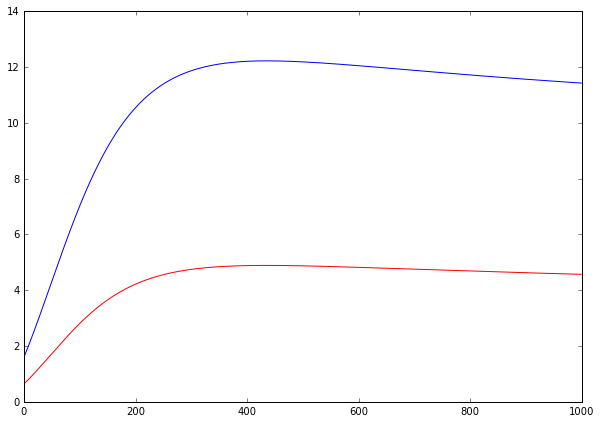

In [301]:
%matplotlib inline
t = np.arange(0, 1000)
alpha = alpha_f(np.linspace(0, 7, 1000))  * 8
k_alpha = alpha * 0.4 
plt.figure(figsize=(10, 7))
plt.plot(t, alpha, 'b')
plt.plot(t, k_alpha, 'r')
plt.show()

# Энергия

## Максимальная энергия

Определим максимальную возможную энергию животного для текущего шага жизни животного

Зададим константу $E_0$ равной 100

In [302]:
import numpy as np

def lambda_f(x):
    x= x/7
    return ((x**2) + (2*x))/((x**2) + 3)

E_0 = 100

E_max = lambda_f(getAge(np.arange(1000))) * E_0
print("Максимальная энергия взрослого животного:", E_max[current_step])

Максимальная энергия взрослого животного: 126.08075653


### График максимальной энергии по шагам жизни агента

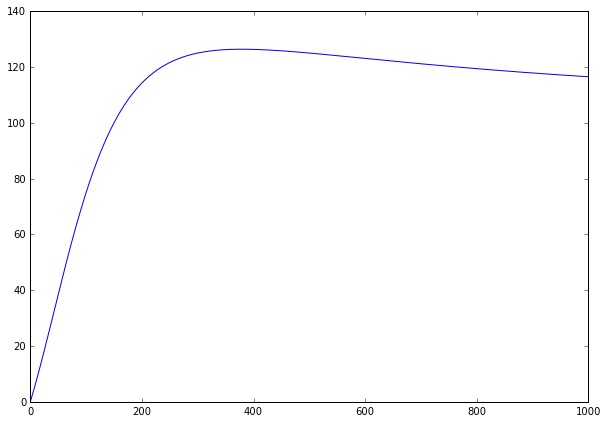

In [303]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

t = np.arange(0, 1000)
plt.figure(figsize=(10, 7))
plt.plot(t, E_max, 'b')
plt.show()

## Пассивное голодание

Наделим 30 летнее животное максимальной энергией для текущего шага жизни

In [304]:
import numpy as np

E = []
E.append(E_max[current_step])

Запускаем случай голодания, когда животное не тратит время на передвижение, и не получает пищи

In [305]:
def epsilon_f(x):
    x = x/ 6
    return (x**3)/((4.5*x**3) - (14*x**2) + 18*x - 0.1) + 2

for i in range(1, 60):
    E.append(E[i-1] - epsilon_f(getAge(current_step + i)))
    if E[i] <= 0:
        print(i)
        break

print(E[51], E[52], E[53])

53
3.64985813035 1.26126869654 -1.12689584242


На 53 шаге пассивного голодания энергия животного переходит через ноль.

### График убывания энергии при пассивном голодании по шагам жизни агента

Животное не двигается, не ест, теряет энергию каждый шаг модели

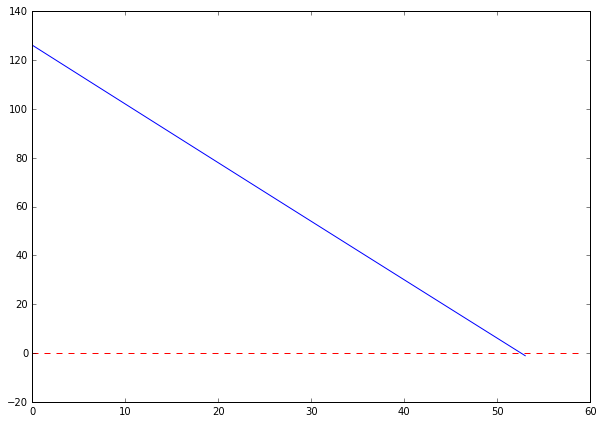

In [306]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

t = np.arange(0, len(E))
plt.figure(figsize=(10, 7))
plt.plot(t, E, 'b')
plt.plot(np.arange(0, 60), np.zeros(60), "r--")
plt.show()

### График длительности возможного голодания по шагам жизни агента

Найдем количество шагов голодания для каждого из возрастов агентов в шагах модели.

In [307]:
E = []

for step in range(0, 1000):
    lst = []
    lst.append(E_max[step])
    for i in range(1, 1000):
        lst.append(lst[i-1] - epsilon_f(getAge(i + step)))
        if lst[i] <= 0:
            break
    E.append(lst)

In [308]:
lenght = []
for lst in E:
    lenght.append(len(lst)-1)

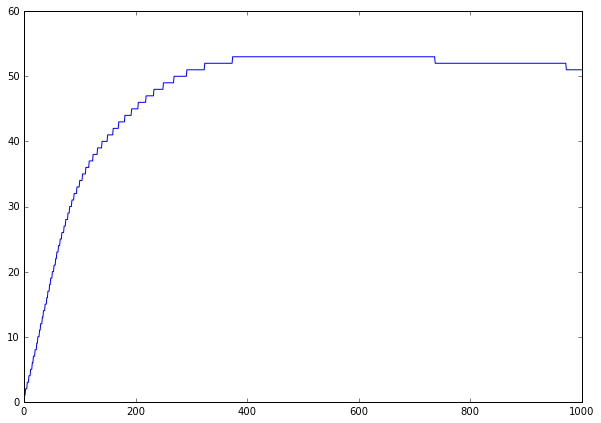

In [309]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

t = np.arange(0, len(E))
plt.figure(figsize=(10, 7))
plt.plot(t, lenght, 'b')
plt.show()

## Активное голодание

Аналогично предыдущему эксперименту наделим 30 летнее животное максимальной энергией для текущего шага жизни и запустим процесс с комфорту скоростью бега

In [310]:
E = []
E.append(E_max[current_step])

def zeta_f(x):
    return x * 0.2

for i in range(1, 60):
    E.append(E[i-1] - epsilon_f(getAge(current_step + i)) - zeta_f(4))
    if E[i] <= 0:
        print(i)
        break


40


При движении с комфортной сокростью животное умрет от голода через 40 ходов.

In [311]:
E2 = []
E2.append(E_max[current_step])

def zeta_f(x):
    return x * 0.2

for i in range(1, 60):
    E2.append(E2[i-1] - epsilon_f(getAge(current_step + i)) - zeta_f(10))
    if E2[i] <= 0:
        print(i)
        break


29


При движении с максимальной сокростью животное умрет от голода через 29 ходов.

### График убывания энергии при активном голодании по шагам жизни агента

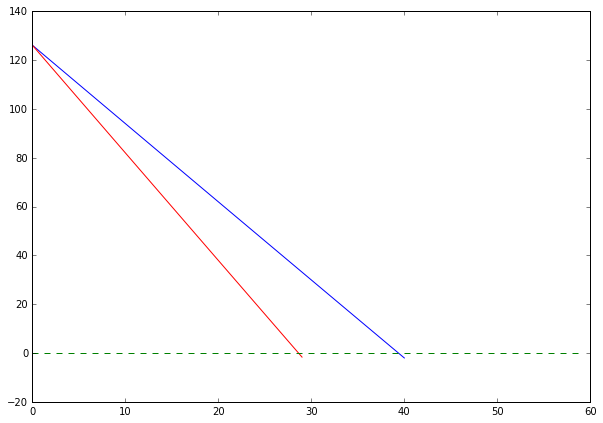

In [312]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

t = np.arange(0, len(E))
t2 = np.arange(0, len(E2))
plt.figure(figsize=(10, 7))
plt.plot(t, E, 'b')
plt.plot(t2, E2, 'r')
plt.plot(np.arange(0, 60), np.zeros(60), "g--")
plt.show()

### График длительности возможного голодания по шагам жизни агента

In [313]:
E = []

for step in range(0, 1000):
    lst = []
    lst.append(E_max[step])
    for i in range(1, 1000):
        lst.append(lst[i-1] - epsilon_f(getAge(i + step)) - zeta_f(10))
        if lst[i] <= 0:
            break
    E.append(lst)

In [314]:
E2 = []

for step in range(0, 1000):
    lst = []
    lst.append(E_max[step])
    for i in range(1, 1000):
        lst.append(lst[i-1] - epsilon_f(getAge(i + step)) - zeta_f(4))
        if lst[i] <= 0:
            break
    E2.append(lst)

In [315]:
lenght = []
for lst in E:
    lenght.append(len(lst)-1)
    
lenght2 = []
for lst in E2:
    lenght2.append(len(lst)-1)

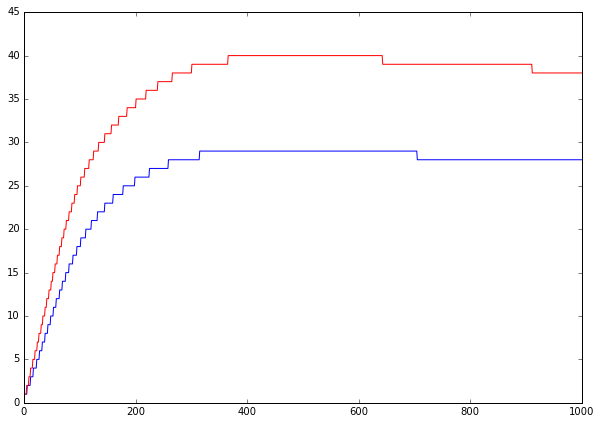

In [316]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

t = np.arange(0, len(E))
t2 = np.arange(0, len(E2))
plt.figure(figsize=(10, 7))
plt.plot(t, lenght, 'b')
plt.plot(t2, lenght2, 'r')
plt.ylim([0,45])
plt.show()

# Питание

### График завсисмости коэфициента питательности от возраста

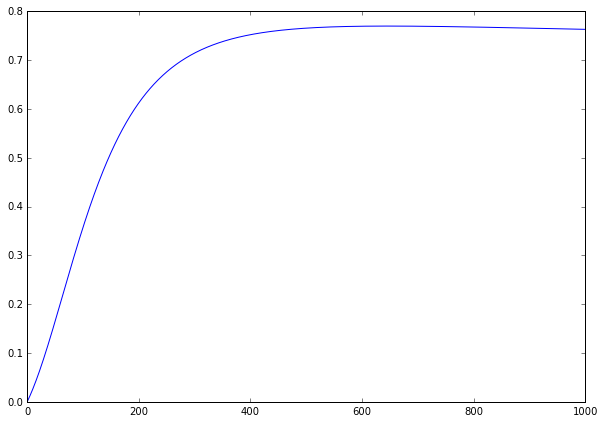

In [327]:
def gamma_f(x):
    x /= 7
    return ((5*x**2) + (5*x))/(7*((x**2)+3))

t = np.arange(0, 1000)
plt.figure(figsize=(10, 7))
plt.plot(t, gamma_f(getAge(t)), 'b')
plt.show()

Согласно основным положениям опустим уровень энергии взрослого животного до 0.6 от максимального

In [325]:
E = 0.6 * E_max[current_step]
print(E)

75.6484539177


Подберем коэффициент $E_f$ так, чтобы если взрослое животное съест взрослую жертву то восстановит свою энергию

Составим равентсво  $0.4 \cdot E_{max} = \gamma(A) \cdot E_f$

In [330]:
E_f = 0.4 * E_max[current_step] / gamma_f(getAge(current_step))
print(E_f)

66.6060606061


Округлим и возьмем $E_f$ равной 65

# Запас сил

## Определение размера запаса сил

Пусть 1 единица запаса сил соответсвует 1 пройденной клетки на максимальной скорости. Тогда согласно основным положениям $S_0 = 50$

### График убывания запаса сил при разных типах голодания оп шагам

Возьмем взрослое животное и посмотрим как убывает запас сил при раззных типах голодания.

C:\Miniconda3\envs\ppenv\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


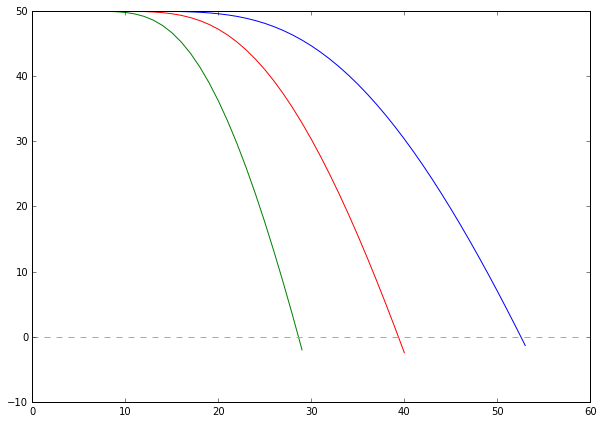

In [317]:
def theta_f(e, e_m):
    return 1 - np.exp((-3*e)/(e_m - e))

E = []
E2 = []
E3 = []

E.append(E_max[current_step])
E2.append(E_max[current_step])
E3.append(E_max[current_step])

for i in range(1, 60):
    E.append(E[i-1] - epsilon_f(getAge(current_step + i)))
    if E[i] <= 0:
        break
        
for i in range(1, 60):
    E2.append(E2[i-1] - epsilon_f(getAge(current_step + i)) - zeta_f(4))
    if E2[i] <= 0:
        break
        
for i in range(1, 60):
    E3.append(E3[i-1] - epsilon_f(getAge(current_step + i)) - zeta_f(10))
    if E3[i] <= 0:
        break

             
t = np.arange(0, len(E))
t2 = np.arange(0, len(E2))
t3 = np.arange(0, len(E3))

T = []
for e in E:
    T.append(theta_f(e, E_max[current_step]) * 50)

T2 = []
for e in E2:
    T2.append(theta_f(e, E_max[current_step]) * 50)
    
T3 = []
for e in E3:
    T3.append(theta_f(e, E_max[current_step]) * 50)



plt.figure(figsize=(10, 7))
plt.plot(t, T, 'b')
plt.plot(t2, T2, 'r')
plt.plot(t3, T3, 'g')
plt.plot(np.arange(0, 60), np.zeros(60), 'y--')
plt.plot()
plt.show()

Найдем те ходы когда соотношение $\frac{E}{E_{max}}$ пересекает значение 0.6 и укажим с помощью вертикальных прямых на графике.

21 0.598943553464
16 0.59274846642
12 0.580249943744


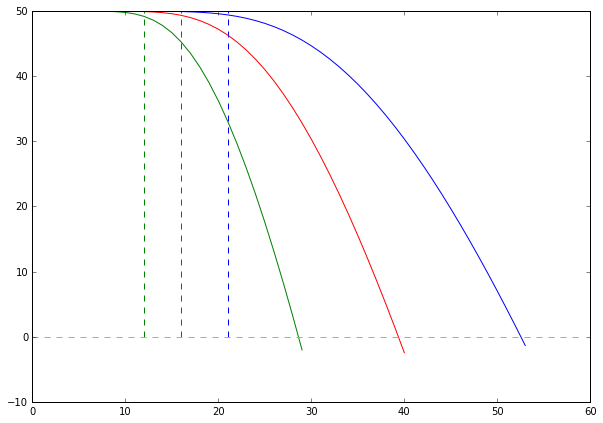

In [318]:
k = 0
k2 = 0 
k3 = 0 

for i in range(0, len(E)):
    if E[i] / E[0] <= 0.6:
        k = i
        print(i, E[i] / E[0])
        break

for i in range(0, len(E2)):
    if E2[i] / E2[0] <= 0.6:
        k2 = i
        print(i, E2[i] / E2[0])
        break

for i in range(0, len(E3)):
    if E3[i] / E3[0] <= 0.6:
        k3 = i
        print(i, E3[i] / E3[0])
        break
        
plt.figure(figsize=(10, 7))
plt.plot(t, T, 'b')
plt.plot([k,k],[0,50],'b--')
plt.plot(t2, T2, 'r')
plt.plot([k2,k2],[0,50],'r--')
plt.plot(t3, T3, 'g')
plt.plot([k3,k3],[0,50],'g--')
plt.plot(np.arange(0, 60), np.zeros(60), 'y--')
plt.plot()
plt.show()

Итак, согласно модели запас начинат убывать при определенном соотношении энергий.

### График зависимости колиства шагов голодания, после которых начинается снижение запаса сил от возраста.

Найдем на каком шагу для каждого возраста соотношение энергии достигает 0.6

C:\Miniconda3\envs\ppenv\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: invalid value encountered in double_scalars
C:\Miniconda3\envs\ppenv\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: divide by zero encountered in double_scalars
C:\Miniconda3\envs\ppenv\lib\site-packages\ipykernel\__main__.py:25: RuntimeWarning: invalid value encountered in double_scalars
C:\Miniconda3\envs\ppenv\lib\site-packages\ipykernel\__main__.py:25: RuntimeWarning: divide by zero encountered in double_scalars
C:\Miniconda3\envs\ppenv\lib\site-packages\ipykernel\__main__.py:39: RuntimeWarning: invalid value encountered in double_scalars
C:\Miniconda3\envs\ppenv\lib\site-packages\ipykernel\__main__.py:39: RuntimeWarning: divide by zero encountered in double_scalars


<function matplotlib.pyplot.show>

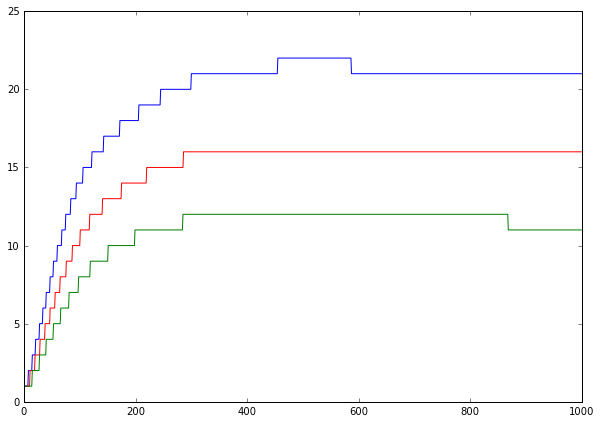

In [319]:
k = []

for step in range(0, 1000):
    lst = []
    lst.append(E_max[step])
    for i in range(1, 1000):
        lst.append(lst[i-1] - epsilon_f(getAge(i + step)))
        if lst[i] <= 0:
            break
    for i in range(0, len(lst)):
        if lst[i]/E_max[step] <= 0.6:
            k.append(i)
            break
            
k2 = []

for step in range(0, 1000):
    lst = []
    lst.append(E_max[step])
    for i in range(1, 1000):
        lst.append(lst[i-1] - epsilon_f(getAge(i + step)) - zeta_f(4))
        if lst[i] <= 0:
            break
    for i in range(0, len(lst)):
        if lst[i]/E_max[step] <= 0.6:
            k2.append(i)
            break

k3 = []

for step in range(0, 1000):
    lst = []
    lst.append(E_max[step])
    for i in range(1, 1000):
        lst.append(lst[i-1] - epsilon_f(getAge(i + step)) - zeta_f(10))
        if lst[i] <= 0:
            break
    for i in range(0, len(lst)):
        if lst[i]/E_max[step] <= 0.6:
            k3.append(i)
            break

plt.figure(figsize=(10, 7))
plt.plot(np.arange(0, len(k)), k, 'b')
plt.plot(np.arange(0, len(k2)), k2, 'r')
plt.plot(np.arange(0, len(k3)), k3, 'g')
plt.show

На данном графике мы определили, через какое количество шагов агент начинает чувствовать снижение выносливости.

## Восстановление и растрат запаса сил при движении

Изменение запаса сил линейно зависит от пройденного расстояния.
Подберем $S_m$ так, чтобы при максимальной потраченная сила равнялась 10. Возьмем $S_m = 10$. 
Но коэффицент $\eta$ должен зависить от максимальной скорости. 

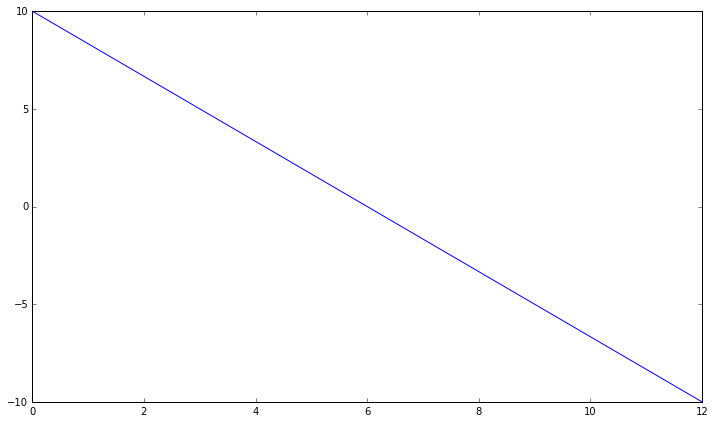

In [354]:
def eta_f(x, V_max):
    return (- 2 * (x/V_max)) + 1
t = np.arange(0, 13)
eta = eta_f(np.linspace(0, 12, 13), 12) * 10
plt.figure(figsize=(12, 7))
plt.plot(t, eta, 'b')
plt.show()

Таким образом, при максимальной скорости за шаг животное любого возраста тратит 10 единиц выносливости. А при комфортной сокрости запас сил восстанавливается. Запас одинаков для животных любого возраста.